In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# games.csv dosyasını oku
games = pd.read_csv("games.csv")

# Sütun isimlerini Türkçeleştirme
games.columns = [
    "Oyun_Günü", "Oyun_No", "Oyun_Durumu", "Ana_Takım_No", "Ziyaretci_Takım_No", 
    "Sezon", "Ana_Takım_No_Kopya", "Ana_Takım_Puan", "Ana_T_Saha_Gol_Yüzdesi", 
    "Ana_T_Serbest_Atış_Yüzdesi", "Ana_T_Üç_Sayı_Yüzdesi", "Ana_T_Assist", 
    "Ana_T_Saha_Gol_Ribaund", "Ziyaretci_Takım_No_Kopya", "Deplasman_Takım_Puan", 
    "Deplasman_Saha_Gol", "Deplasman_Serbest_Atış", "Deplasman_ÜçPuan", 
    "Deplasman_Assist", "Deplasman_Ribaund", "Ana_Takım_Kazanma"
]

Ana_T_Assist                  99
Ana_T_Serbest_Atış_Yüzdesi    99
Ana_T_Üç_Sayı_Yüzdesi         99
Ana_Takım_Puan                99
Ana_T_Saha_Gol_Yüzdesi        99
Deplasman_Ribaund             99
Deplasman_Assist              99
Deplasman_Serbest_Atış        99
Deplasman_ÜçPuan              99
Deplasman_Saha_Gol            99
Ana_T_Saha_Gol_Ribaund        99
Deplasman_Takım_Puan          99
Oyun_Günü                      0
Ziyaretci_Takım_No             0
Ana_Takım_No                   0
Oyun_Durumu                    0
Oyun_No                        0
Ana_Takım_No_Kopya             0
Sezon                          0
Ziyaretci_Takım_No_Kopya       0
Ana_Takım_Kazanma              0
dtype: int64


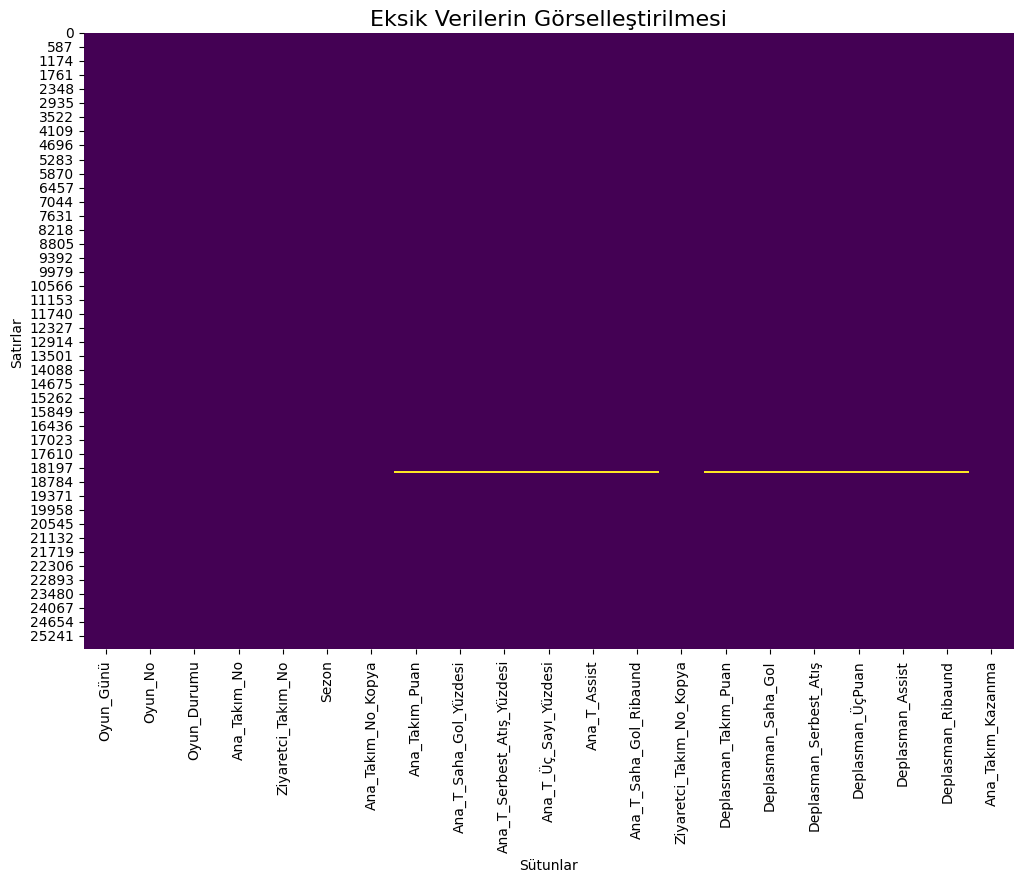

In [3]:
# Eksik verilerin sayısını kontrol et
print(games.isnull().sum().sort_values(ascending=False))

# Eksik verilerin görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(games.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Verilerin Görselleştirilmesi", fontsize=16)
plt.xlabel("Sütunlar")
plt.ylabel("Satırlar")
plt.show()

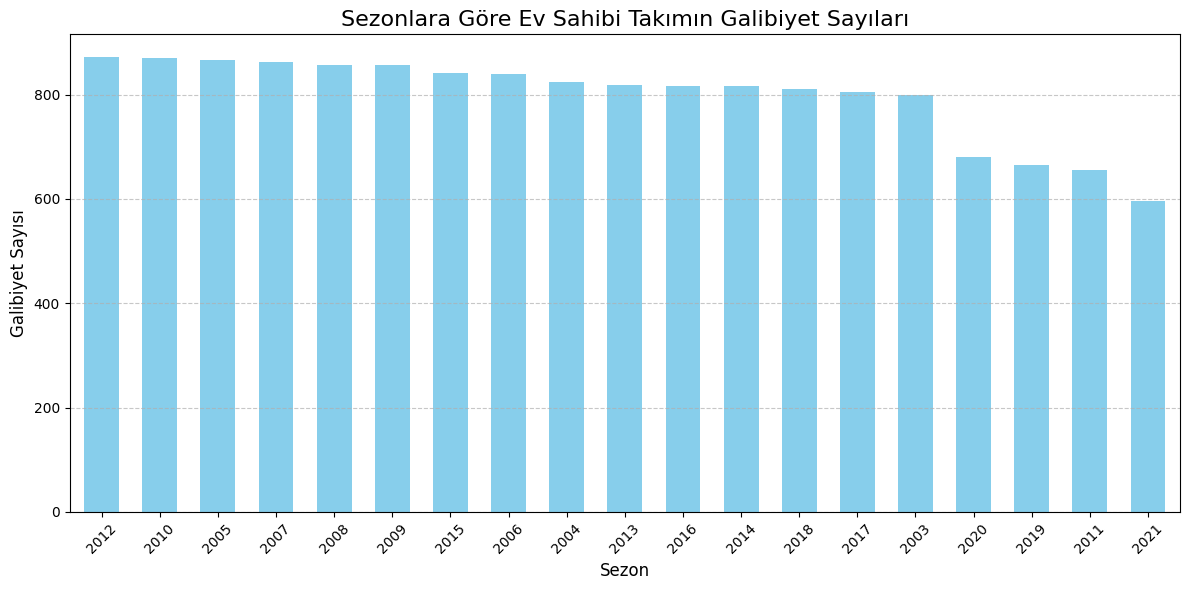

In [5]:
# Sezonlara göre ev sahibi takımın maçı kazanma durumu
plt.figure(figsize=(12, 6))
games.groupby("Sezon")["Ana_Takım_Kazanma"].sum().sort_values(ascending=False).plot.bar(width=0.6, color="#87CEEB")

# Grafik başlıkları ve etiketleri
plt.title("Sezonlara Göre Ev Sahibi Takımın Galibiyet Sayıları", fontsize=16)
plt.xlabel("Sezon", fontsize=12)
plt.ylabel("Galibiyet Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Grafiği göster
plt.tight_layout()
plt.show()


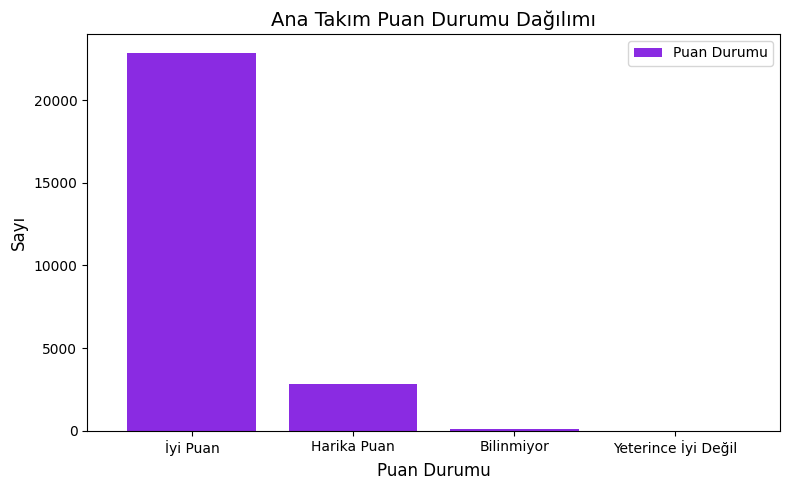

In [6]:
# Puan Kıyaslama Fonksiyonu
def Puan_Kıyasla(puan):
    if pd.isnull(puan):  # Eğer puan eksikse
        return "Bilinmiyor"
    elif puan >= 120:
        return "Harika Puan"
    elif 50 <= puan < 120:
        return "İyi Puan"
    else:
        return "Yeterince İyi Değil"

# Yeni sütunu oluştur
games["Puan_Durumu"] = games["Ana_Takım_Puan"].apply(Puan_Kıyasla)

# Kategorilerin sayısını ve grafiğini görselleştirme
plt.figure(figsize=(8, 5))
games["Puan_Durumu"].value_counts().plot.bar(
    width=0.8, color="#8A2BE2", label="Puan Durumu"
)

# Grafik başlıkları ve etiketler
plt.title("Ana Takım Puan Durumu Dağılımı", fontsize=14)
plt.xlabel("Puan Durumu", fontsize=12)
plt.ylabel("Sayı", fontsize=12)
plt.legend()
plt.xticks(rotation=0)

# Grafiği göster
plt.tight_layout()
plt.show()

Ana_Takım_Kazanma
0    10641
1    15155
dtype: int64


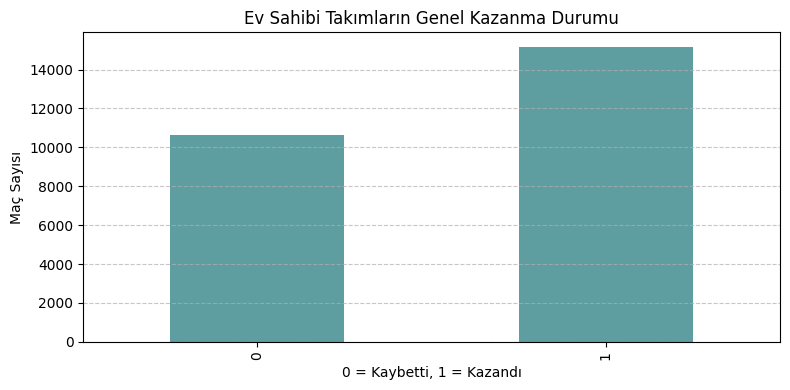

In [7]:
# Genel kazanma ve kaybetme durumlarını inceleme
genel_kazanc = games.groupby("Ana_Takım_Kazanma").size()
print(genel_kazanc)

# Görselleştirme
plt.figure(figsize=(8, 4))
genel_kazanc.plot.bar(
    width=0.5, color="#5F9EA0", title="Ev Sahibi Takımların Genel Kazanma Durumu"
)
plt.ylabel("Maç Sayısı")
plt.xlabel("0 = Kaybetti, 1 = Kazandı")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Ana_Takım_No  Ana_Takım_Kazanma
1610612737    1                    484
              0                    371
1610612738    1                    581
              0                    333
1610612739    1                    532
              0                    358
1610612740    1                    444
              0                    377
1610612741    1                    506
              0                    368
1610612742    1                    570
              0                    305
1610612743    1                    574
              0                    274
1610612744    1                    578
              0                    293
1610612745    1                    562
              0                    312
1610612746    1                    521
              0                    353
1610612747    1                    564
              0                    381
1610612748    1                    609
              0                    313
1610612749    1                 

<Figure size 2000x1000 with 0 Axes>

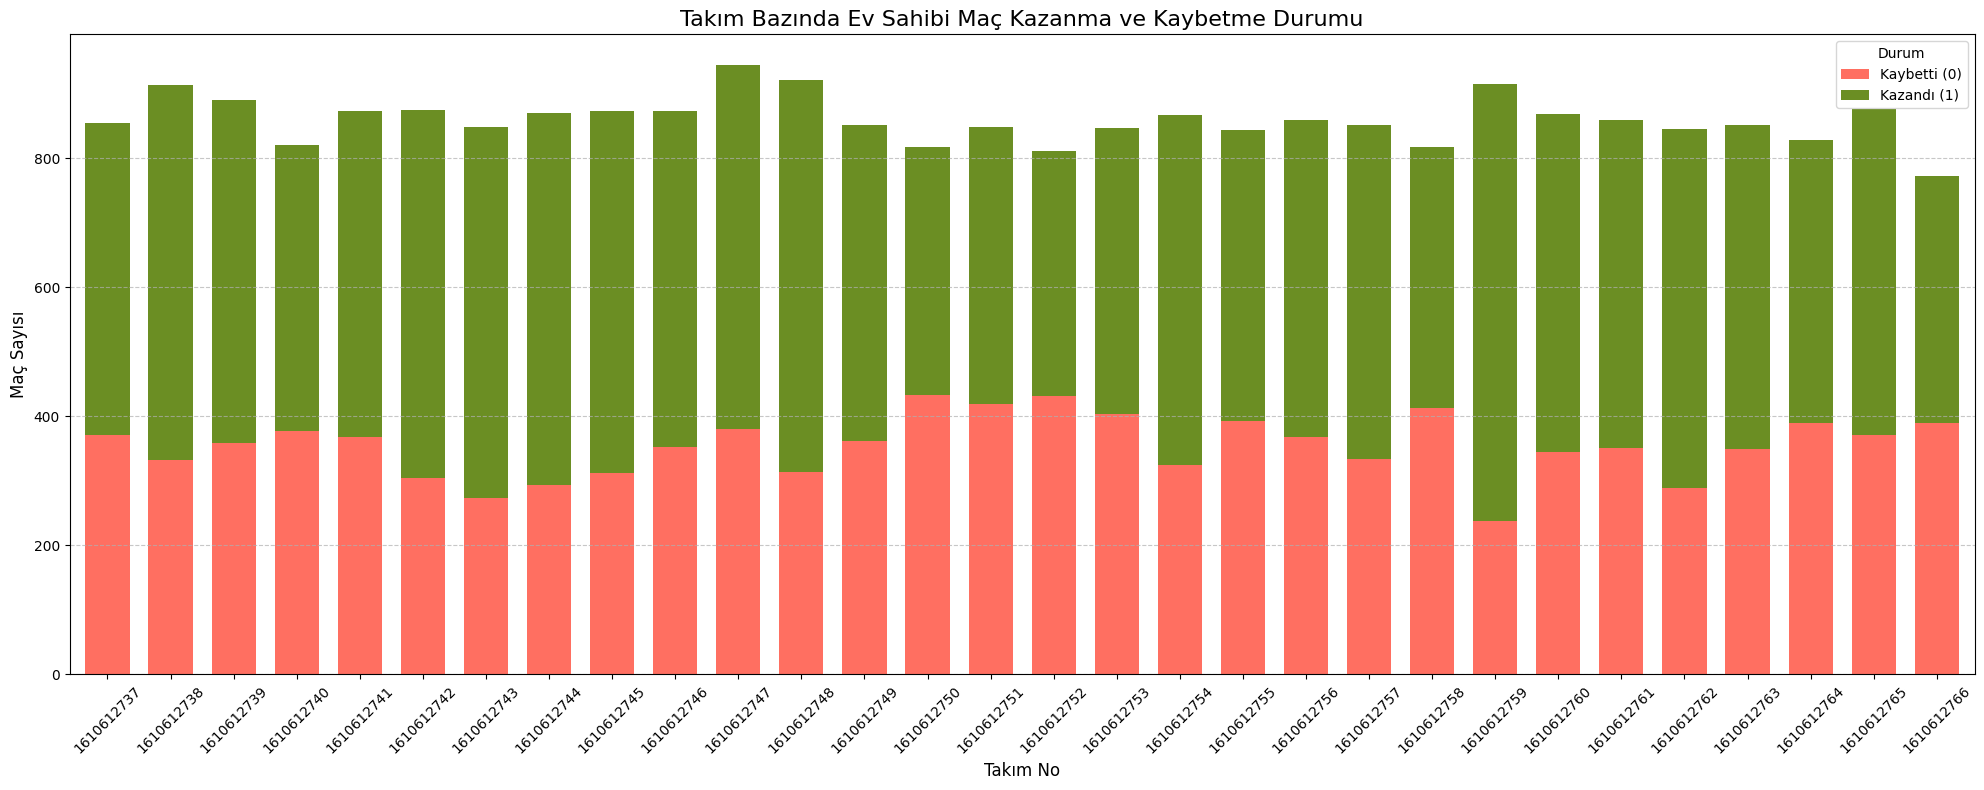

In [8]:
# Takım bazında kazanma ve kaybetme sayıları
takim_bazinda_kazanc = games.groupby(["Ana_Takım_No"])["Ana_Takım_Kazanma"].value_counts()
print(takim_bazinda_kazanc)

# Görselleştirme
plt.figure(figsize=(20, 10))
takim_bazinda_kazanc.unstack().plot(
    kind="bar", stacked=True, color=["#FF6F61", "#6B8E23"], width=0.7, figsize=(20, 8)
)

# Grafik başlıkları ve etiketler
plt.title("Takım Bazında Ev Sahibi Maç Kazanma ve Kaybetme Durumu", fontsize=16)
plt.xlabel("Takım No", fontsize=12)
plt.ylabel("Maç Sayısı", fontsize=12)
plt.legend(["Kaybetti (0)", "Kazandı (1)"], title="Durum", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



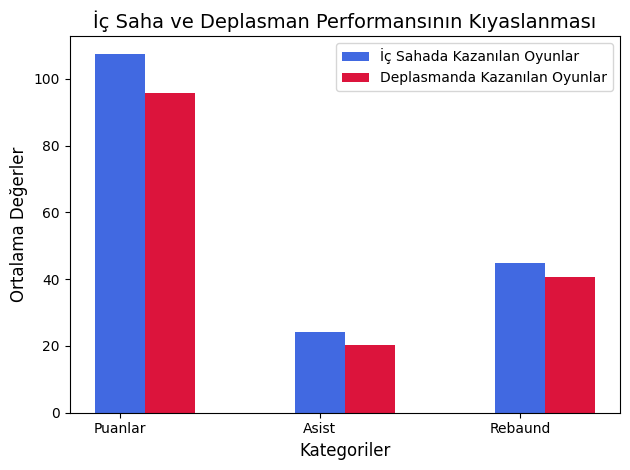

In [9]:
# Kazanan ve kaybeden grupların oluşturulması
grup = games.groupby('Ana_Takım_Kazanma')
kazanma_durumu = grup.get_group(1)  # Kazanan oyunlar

# Ortalama hesaplama fonksiyonu
def ortalama_bul(grup, sütun):
    return grup[sütun].mean()

# İç saha ve deplasman için ortalamalar
İc_Saha = [
    ortalama_bul(kazanma_durumu, 'Ana_Takım_Puan'),
    ortalama_bul(kazanma_durumu, 'Ana_T_Assist'),
    ortalama_bul(kazanma_durumu, 'Ana_T_Saha_Gol_Ribaund')
]

Deplasman = [
    ortalama_bul(kazanma_durumu, 'Deplasman_Takım_Puan'),
    ortalama_bul(kazanma_durumu, 'Deplasman_Assist'),
    ortalama_bul(kazanma_durumu, 'Deplasman_Ribaund')
]

# Veriler ve görselleştirme
text = ['Puanlar', 'Asist', 'Rebaund']
text2 = np.arange(len(text))

plt.bar(text, İc_Saha, width=0.25, color='#4169E1', label='İç Sahada Kazanılan Oyunlar')
plt.bar(text2 + 0.25, Deplasman, width=0.25, color='#DC143C', label='Deplasmanda Kazanılan Oyunlar')

# Başlık ve etiketler
plt.title("İç Saha ve Deplasman Performansının Kıyaslanması", fontsize=14)
plt.ylabel("Ortalama Değerler", fontsize=12)
plt.xlabel("Kategoriler", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

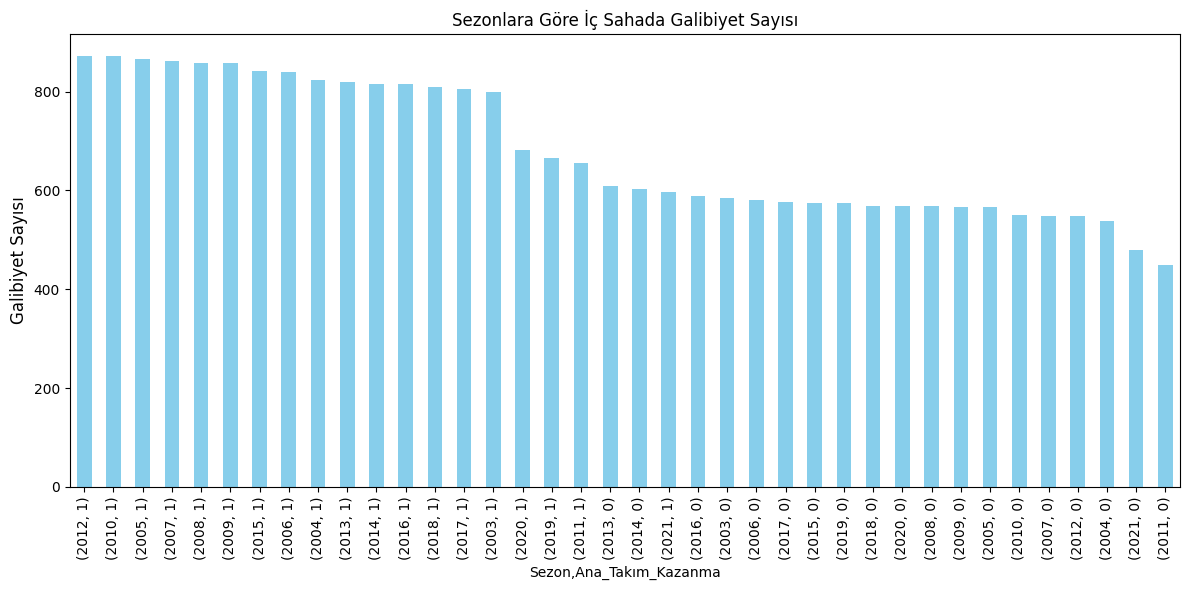

In [10]:
# Sezon bazında iç saha galibiyetleri
plt.figure(figsize=(12, 6))
plt.ylabel("Galibiyet Sayısı", fontsize=12)
games.groupby("Sezon")["Ana_Takım_Kazanma"].value_counts().sort_values(ascending=False).plot.bar(
    width=0.50, color="#87CEEB", title="Sezonlara Göre İç Sahada Galibiyet Sayısı"
)
plt.tight_layout()
plt.show()

            Oyun_No  Ana_Takım_No  Ziyaretci_Takım_No         Sezon  \
count  2.579600e+04  2.579600e+04        2.579600e+04  25796.000000   
mean   2.169208e+07  1.610613e+09        1.610613e+09   2011.798341   
std    5.496041e+06  8.638857e+00        8.654846e+00      5.397985   
min    1.030000e+07  1.610613e+09        1.610613e+09   2003.000000   
25%    2.060109e+07  1.610613e+09        1.610613e+09   2007.000000   
50%    2.120040e+07  1.610613e+09        1.610613e+09   2012.000000   
75%    2.170070e+07  1.610613e+09        1.610613e+09   2016.000000   
max    5.200021e+07  1.610613e+09        1.610613e+09   2021.000000   

       Ana_Takım_No_Kopya  Ana_Takım_Puan  Ana_T_Saha_Gol_Yüzdesi  \
count        2.579600e+04    25697.000000            25697.000000   
mean         1.610613e+09      103.106044                0.460313   
std          8.638857e+00       13.174726                0.056629   
min          1.610613e+09       36.000000                0.250000   
25%          1.

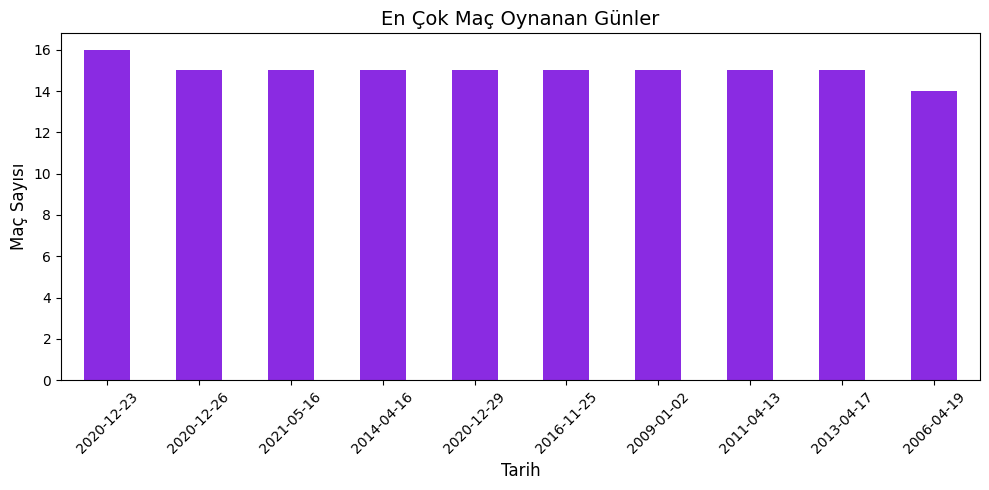

In [11]:
# Tüm sayısal sütunlar için tanımlayıcı istatistikler
print(games.describe())

# Sadece kategorik sütunlar için tanımlayıcı istatistikler
print(games.describe(include='object'))



# Tarihlerde en çok maç oynanan günler
print(games["Oyun_Günü"].value_counts().head())

# Görselleştirme (İlk 10 tarih için)
games["Oyun_Günü"].value_counts().head(10).plot.bar(color="#8A2BE2", figsize=(10, 5))
plt.title("En Çok Maç Oynanan Günler", fontsize=14)
plt.ylabel("Maç Sayısı", fontsize=12)
plt.xlabel("Tarih", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# games_details.csv dosyasını oku
games_details = pd.read_csv("games_details.csv")

# Veri seti boyutunu kontrol et
print(f'Oyun dosyasında {games_details.shape[0]} satır ve {games_details.shape[1]} sütun bulunuyor.')

# Sütun isimlerini listele
print("Orijinal Sütun İsimleri:")
print(games_details.columns.tolist())

# Sütun isimlerini Türkçeleştirme
games_details.columns = [
    'Oyun_No', 'Takım_No', 'Takım_Kısaltması', 'Oynanan_Şehir', 
    'Oyuncu_No', 'Oyuncu_İsmi', 'Oyuncu_Pozisyonu', 'Başlangıç_Pozisyonu', 
    'Yorum', 'Oynanan_Dakika', 'Saha_Gol_Dk', 'Saha_Hedef', 
    'Alan_Hedef', 'Saha_Üç_Sayı_Yüzdesi', 'Denenen_Üç_Sayılık_Yüzdesi', 
    'Üç_Sayılık_Yüzdesi', 'Yapılan_Serbest_Atış', 'Serbest_Atış_Denemesi', 
    'Serbest_Atış_Yüzdesi', 'Hücüm_Ribaundları', 'Savunma_Ribaundları', 
    'Ribaund', 'Asist', 'Yıldızı_Parlayan', 'Engellenen_Cekimler', 
    'Devir', 'Kişisel_Faul', 'Oyuncu_Puan', 'Artı_Eksi'
]

print("Türkçeleştirilmiş Sütun İsimleri:")
print(games_details.columns.tolist())
# Veri seti hakkında genel bilgi
print("\nVeri Seti Genel Bilgileri:")
games_details.info()

C:\Users\Mrlka\AppData\Local\Temp\ipykernel_24384\4120488984.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv("games_details.csv")


Oyun dosyasında 645953 satır ve 29 sütun bulunuyor.
Orijinal Sütun İsimleri:
['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']
Türkçeleştirilmiş Sütun İsimleri:
['Oyun_No', 'Takım_No', 'Takım_Kısaltması', 'Oynanan_Şehir', 'Oyuncu_No', 'Oyuncu_İsmi', 'Oyuncu_Pozisyonu', 'Başlangıç_Pozisyonu', 'Yorum', 'Oynanan_Dakika', 'Saha_Gol_Dk', 'Saha_Hedef', 'Alan_Hedef', 'Saha_Üç_Sayı_Yüzdesi', 'Denenen_Üç_Sayılık_Yüzdesi', 'Üç_Sayılık_Yüzdesi', 'Yapılan_Serbest_Atış', 'Serbest_Atış_Denemesi', 'Serbest_Atış_Yüzdesi', 'Hücüm_Ribaundları', 'Savunma_Ribaundları', 'Ribaund', 'Asist', 'Yıldızı_Parlayan', 'Engellenen_Cekimler', 'Devir', 'Kişisel_Faul', 'Oyuncu_Puan', 'Artı_Eksi']

Veri Seti Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries,


Eksik Değerlerin Sütunlara Göre Dağılımı:
Oyuncu_Pozisyonu              615591
Yorum                         540351
Başlangıç_Pozisyonu           398738
Artı_Eksi                     129264
Oynanan_Dakika                105603
Alan_Hedef                    105603
Saha_Gol_Dk                   105603
Serbest_Atış_Yüzdesi          105603
Serbest_Atış_Denemesi         105603
Denenen_Üç_Sayılık_Yüzdesi    105603
Üç_Sayılık_Yüzdesi            105603
Saha_Üç_Sayı_Yüzdesi          105603
Saha_Hedef                    105603
Savunma_Ribaundları           105603
Ribaund                       105603
Yıldızı_Parlayan              105603
Asist                         105603
Engellenen_Cekimler           105603
Devir                         105603
Hücüm_Ribaundları             105603
Yapılan_Serbest_Atış          105603
Kişisel_Faul                  105603
Oyuncu_Puan                   105603
Oyuncu_İsmi                        0
Takım_Kısaltması                   0
Takım_No                        

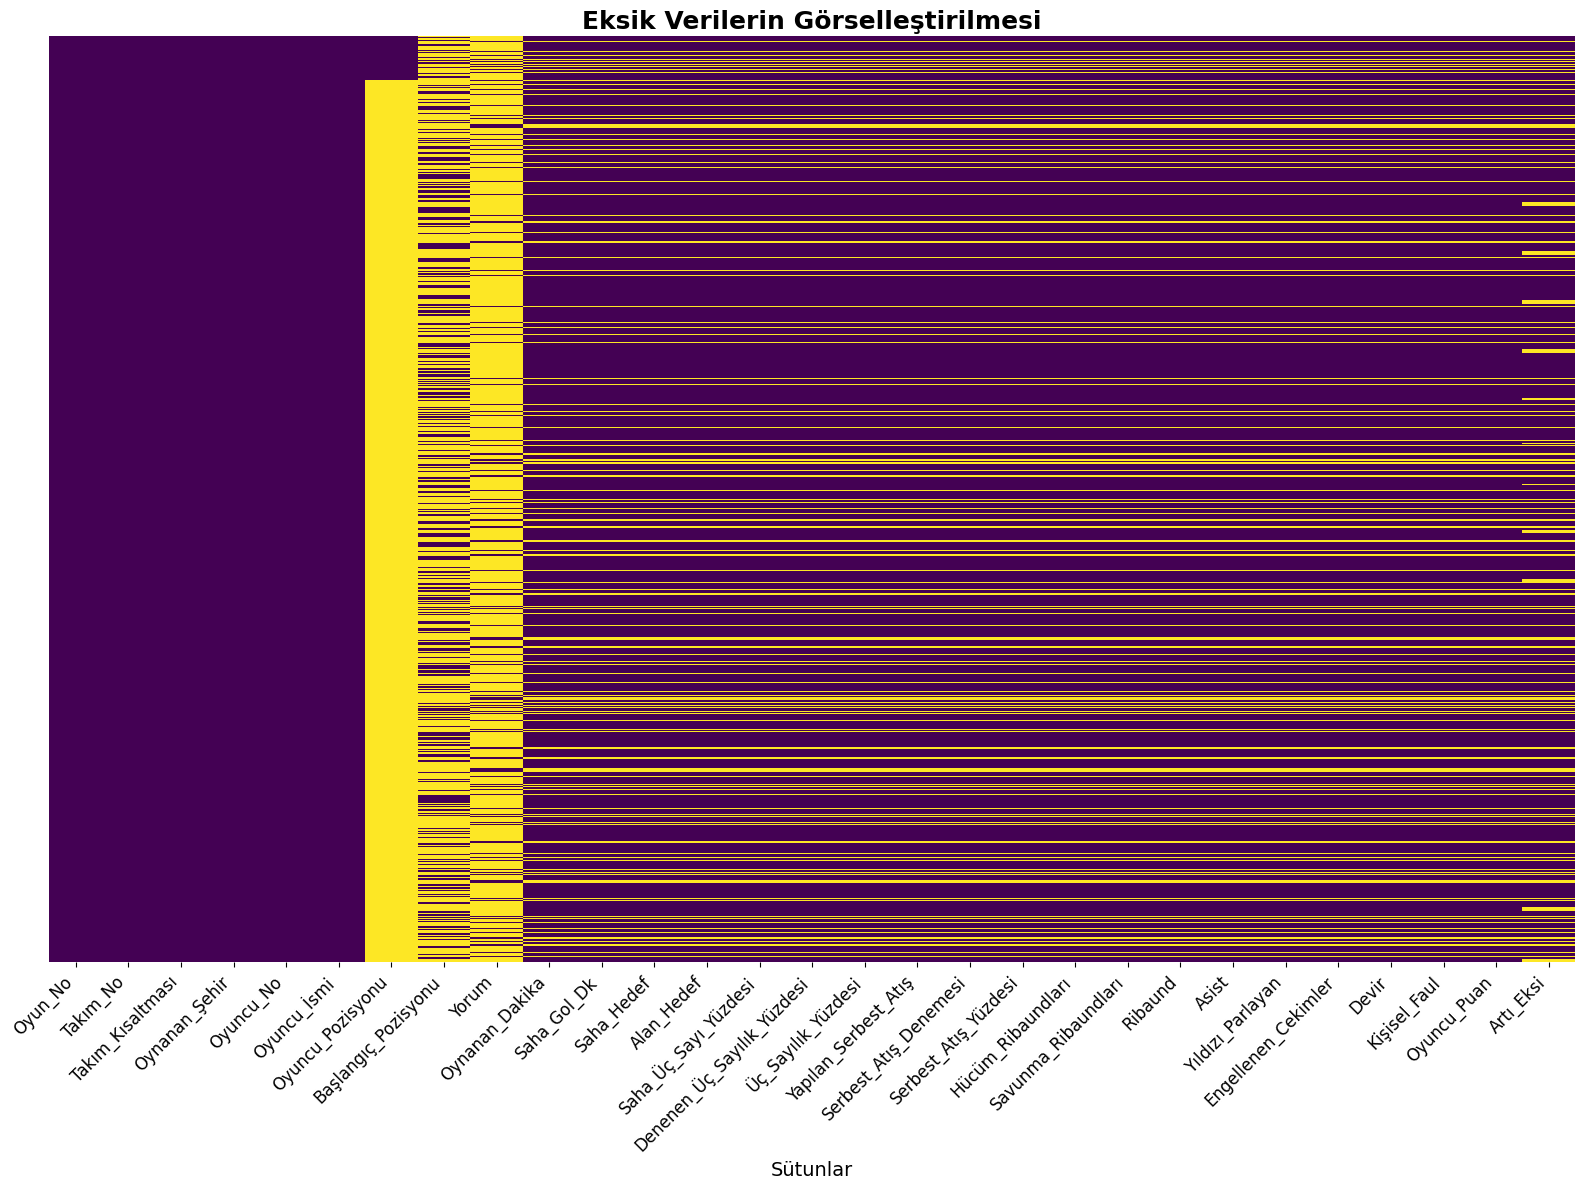

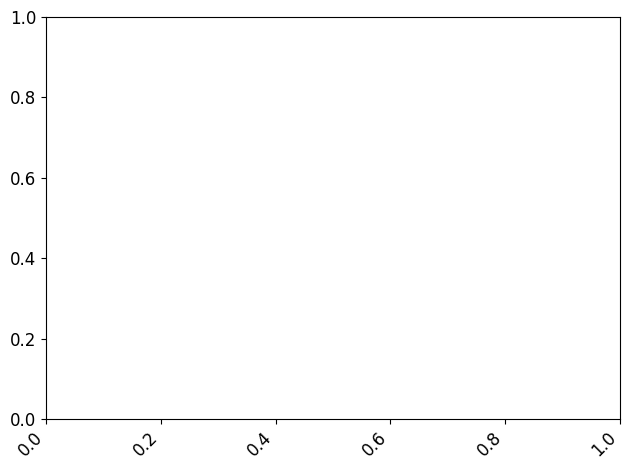

In [14]:
# Eksik değerlerin sayısını kontrol et
missing_values = games_details.isnull().sum().sort_values(ascending=False)
print("\nEksik Değerlerin Sütunlara Göre Dağılımı:")
print(missing_values)

# Eksik verilerin görselleştirilmesi
plt.figure(figsize=(16, 12))  # Daha büyük bir grafik boyutu
sns.heatmap(games_details.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # Y eksenindeki etiketleri gizledik
plt.title("Eksik Verilerin Görselleştirilmesi", fontsize=18, fontweight='bold')  # Başlığı büyüttük
plt.xlabel("Sütunlar", fontsize=14)  # X eksenini etiketledik
plt.xticks(rotation=45, ha='right', fontsize=12)  # X ekseni etiketlerini döndürdük ve hizaladık
plt.tight_layout()  # Düzeni optimize ettik
plt.show()


# X eksenindeki etiketleri döndürerek daha okunabilir hale getirme
plt.xticks(rotation=45, ha='right', fontsize=12)  # Etiketler 45 derece döndürüldü ve hizalama yapıldı
plt.yticks(fontsize=12)  # Y eksenindeki etiketlerin boyutu artırıldı
plt.tight_layout()  # Grafik düzenini optimize etme
plt.show()


In [15]:
# Eksik veri işleme: 'Oyuncu_Pozisyonu' sütunundaki eksik verileri "Yedek" olarak doldur
games_details['Oyuncu_Pozisyonu'].fillna('Yedek', inplace=True)

# Sadece sayısal sütunlardaki eksik verileri sütunların ortalama değeriyle doldur
games_details.fillna(games_details.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

# Eksik veri işleme sonrası kontrol
print("\nEksik Değerlerin İşlemden Sonraki Durumu:")
print(games_details.isnull().sum())

# Temel istatistiksel özet
print("\nSayısal Sütunların Tanımlayıcı İstatistikleri:")
print(games_details.describe())

print("\nKategorik Sütunların Tanımlayıcı İstatistikleri:")
print(games_details.describe(include='object'))

# Eksik verilerin işlenmiş haliyle yeni bir CSV dosyası kaydetmek için
games_details.to_csv("games_details_cleaned.csv", index=False)
print("\nEksik veriler işlenmiş ve 'games_details_cleaned.csv' olarak kaydedilmiştir.")


C:\Users\Mrlka\AppData\Local\Temp\ipykernel_24384\2235393975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_details['Oyuncu_Pozisyonu'].fillna('Yedek', inplace=True)



Eksik Değerlerin İşlemden Sonraki Durumu:
Oyun_No                            0
Takım_No                           0
Takım_Kısaltması                   0
Oynanan_Şehir                      0
Oyuncu_No                          0
Oyuncu_İsmi                        0
Oyuncu_Pozisyonu                   0
Başlangıç_Pozisyonu           398738
Yorum                         540351
Oynanan_Dakika                105603
Saha_Gol_Dk                        0
Saha_Hedef                         0
Alan_Hedef                         0
Saha_Üç_Sayı_Yüzdesi               0
Denenen_Üç_Sayılık_Yüzdesi         0
Üç_Sayılık_Yüzdesi                 0
Yapılan_Serbest_Atış               0
Serbest_Atış_Denemesi              0
Serbest_Atış_Yüzdesi               0
Hücüm_Ribaundları                  0
Savunma_Ribaundları                0
Ribaund                            0
Asist                              0
Yıldızı_Parlayan                   0
Engellenen_Cekimler                0
Devir                           

                  Kişisel_Faul
Takım_Kısaltması              
ATL                        6.0
BKN                        6.0
BOS                       15.0
CHA                        6.0
CHI                        6.0
CLE                        6.0
DAL                        6.0
DEN                        6.0
DET                        6.0
GSW                        6.0
HOU                        6.0
IND                        6.0
LAC                        6.0
LAL                        6.0
MEM                        6.0
MIA                        6.0
MIL                        6.0
MIN                        6.0
NJN                        6.0
NOH                        6.0
NOK                        6.0
NOP                        6.0
NYK                        6.0
OKC                        6.0
ORL                        6.0
PHI                        6.0
PHX                        6.0
POR                        6.0
SAC                        6.0
SAS                        6.0
SEA     

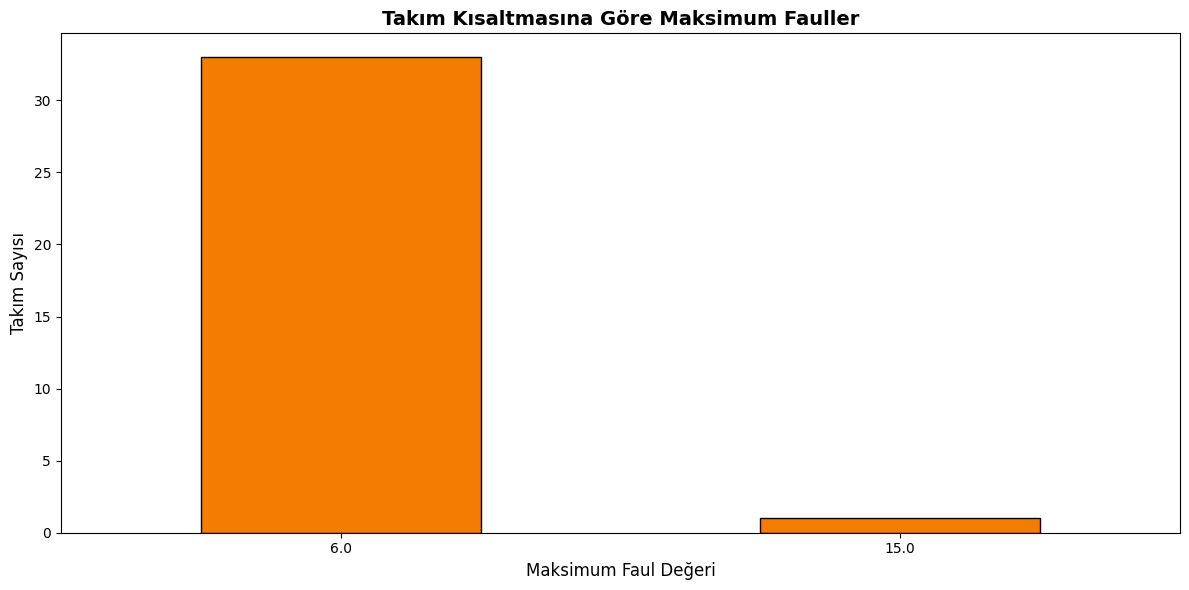

In [16]:
# Takım Kısaltmasına Göre Maksimum Faul Değerleri
max_fouls = games_details.groupby("Takım_Kısaltması").agg({"Kişisel_Faul": "max"})

# Maksimum faul değerlerini yazdır
print(max_fouls)

# Grafiğin oluşturulması
plt.figure(figsize=(12, 6))
max_fouls["Kişisel_Faul"].value_counts().plot.bar(
    width=0.5, color="#F57C02", edgecolor="black"
)

# Grafik başlık ve etiketleri
plt.title("Takım Kısaltmasına Göre Maksimum Fauller", fontsize=14, fontweight="bold")
plt.ylabel("Takım Sayısı", fontsize=12)
plt.xlabel("Maksimum Faul Değeri", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Grafiği göster
plt.show()

Oynanan Şehirler:
['Minnesota' 'Miami' 'Cleveland' 'Chicago' 'Indiana' 'San Antonio'
 'Milwaukee' 'Golden State' 'Toronto' 'Denver' 'Sacramento' 'Utah'
 'Washington' 'Portland' 'Orlando' 'LA' 'Atlanta' 'Detroit' 'Boston'
 'Dallas' 'Houston' 'New York' 'Memphis' 'Charlotte' 'New Orleans'
 'Phoenix' 'Los Angeles' 'Brooklyn' 'Philadelphia' 'Oklahoma City'
 'New Jersey' 'Seattle' 'New Orleans/Oklahoma City']

Basketbolcular:
['Anthony Edwards' 'Jaden McDaniels' 'Karl-Anthony Towns' ...
 'Brian Butch' 'Tyler Wilkerson' 'Kevin Anderson']


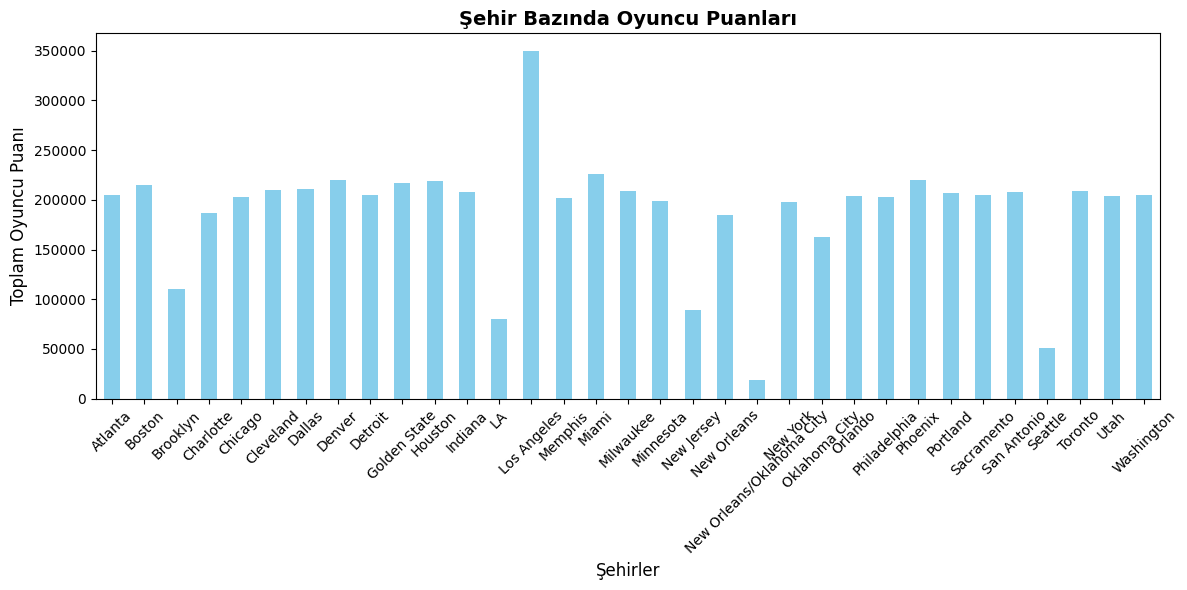

In [17]:
# Maçların oynandığı şehirlerin listesi
print("Oynanan Şehirler:")
print(games_details["Oynanan_Şehir"].unique())

# Maçlarda oynayan basketbolcuların isimleri
print("\nBasketbolcular:")
print(games_details["Oyuncu_İsmi"].unique())

# Şehir Bazında Oyuncu Puanlarının Görselleştirilmesi
plt.figure(figsize=(12, 6))
games_details.groupby("Oynanan_Şehir")["Oyuncu_Puan"].sum().plot.bar(color="#87CEEB", width=0.5)
plt.title("Şehir Bazında Oyuncu Puanları", fontsize=14, fontweight="bold")
plt.ylabel("Toplam Oyuncu Puanı", fontsize=12)
plt.xlabel("Şehirler", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Players Dosyasındaki Satır ve Sütun Sayısı: (7228, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Oyuncu_İsmi  7228 non-null   object
 1   Takım_No     7228 non-null   int64 
 2   Oyuncu_No    7228 non-null   int64 
 3   Sezon        7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB

Players Dosyasındaki Oyuncular:
["Royce O'Neale" 'Bojan Bogdanovic' 'Rudy Gobert' ... 'Lanny Smith'
 'Warren Carter' 'Bennet Davis']

Ranking Dosyasındaki Satır ve Sütun Sayısı: (201792, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201792 entries, 0 to 201791
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Takım_No                201792 non-null  int64  
 1   Lig_No                  201792 non-null  int64  
 2   Sezon_No         

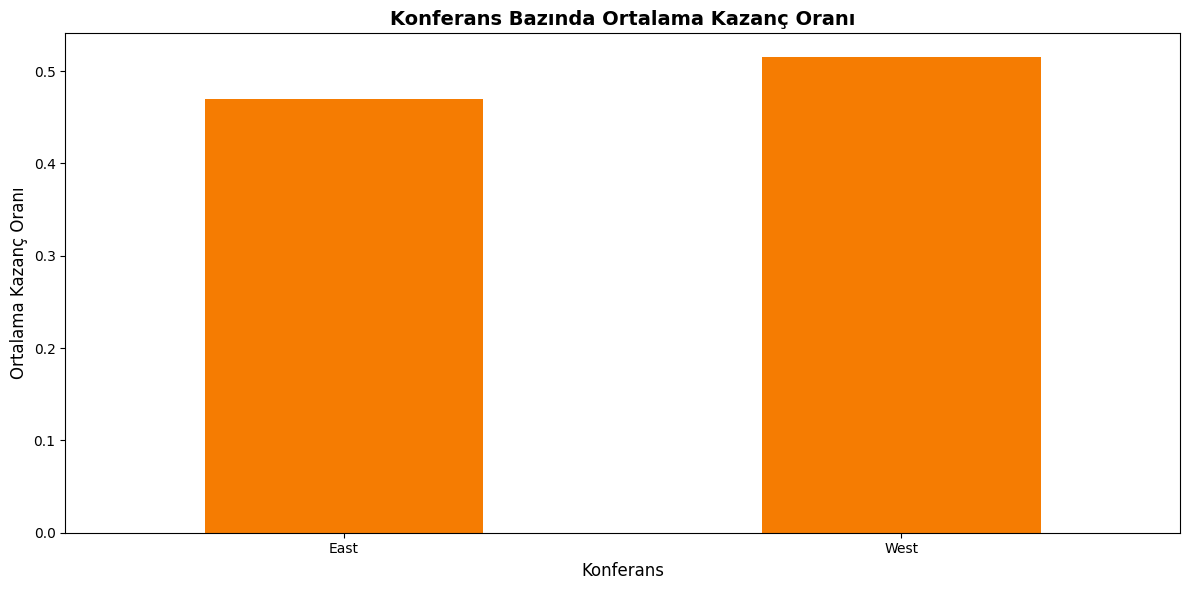

In [18]:
# Players.csv Dosyasının Analizi
players = pd.read_csv("players.csv")
players.columns = ["Oyuncu_İsmi", "Takım_No", "Oyuncu_No", "Sezon"]

print(f"\nPlayers Dosyasındaki Satır ve Sütun Sayısı: {players.shape}")
players.info()

# Players İçerisindeki Benzersiz Oyuncuların Listesi
print("\nPlayers Dosyasındaki Oyuncular:")
print(players["Oyuncu_İsmi"].unique())

# Ranking.csv Dosyasının Analizi
ranking = pd.read_csv("ranking.csv")
ranking.columns = [
    "Takım_No", "Lig_No", "Sezon_No", "Puan_Tarihi", "Konferans", "Takım",
    "Sezonda_Oynanan_Maç", "Sezonda_Kazanılan_Maç", "Sezonda_Kaybedilen_Maç",
    "Kazanç", "Ev_Rekoru", "Yol_Rekoru", "Oyuna_Dönüş"
]

print(f"\nRanking Dosyasındaki Satır ve Sütun Sayısı: {ranking.shape}")
ranking.info()

# Konferans Bazında Kazanç Oranı Görselleştirme
plt.figure(figsize=(12, 6))
ranking.groupby("Konferans")["Kazanç"].mean().plot.bar(color="#F57C02", width=0.5)
plt.title("Konferans Bazında Ortalama Kazanç Oranı", fontsize=14, fontweight="bold")
plt.ylabel("Ortalama Kazanç Oranı", fontsize=12)
plt.xlabel("Konferans", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


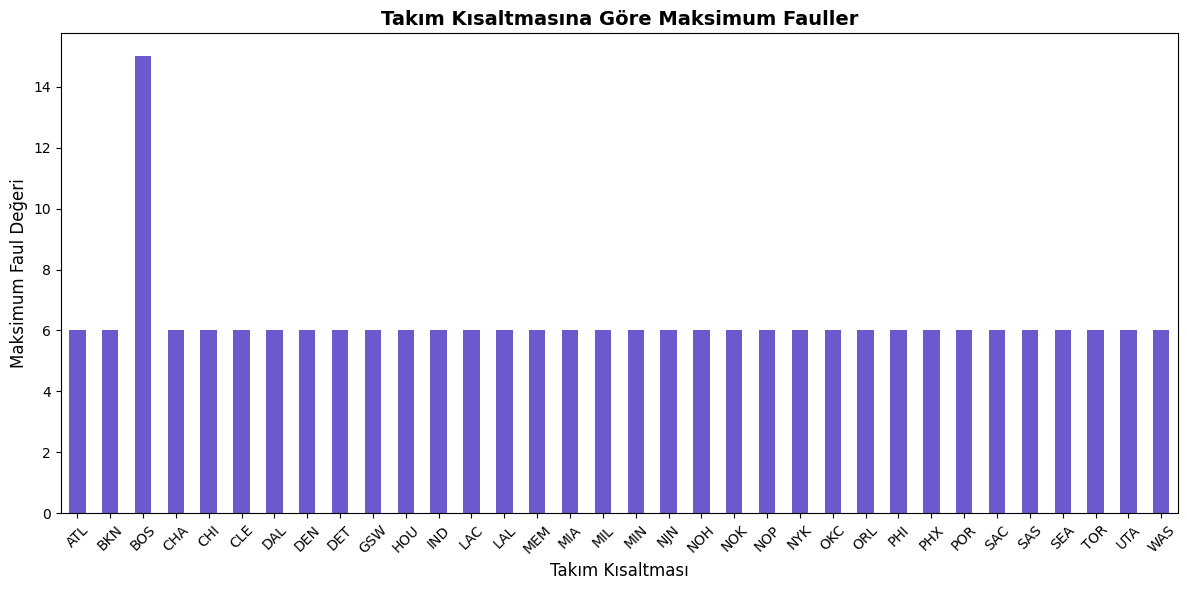


Birleştirilmiş Verinin İlk 5 Satırı:
     Oyuncu_İsmi    Takım_No  Oyuncu_No  Sezon  Lig_No  Sezon_No Puan_Tarihi  \
0  Royce O'Neale  1610612762    1626220   2019       0     22021  2022-03-12   
1  Royce O'Neale  1610612762    1626220   2019       0     22021  2022-03-11   
2  Royce O'Neale  1610612762    1626220   2019       0     22021  2022-03-10   
3  Royce O'Neale  1610612762    1626220   2019       0     22021  2022-03-09   
4  Royce O'Neale  1610612762    1626220   2019       0     22021  2022-03-08   

  Konferans Takım  Sezonda_Oynanan_Maç  Sezonda_Kazanılan_Maç  \
0      West  Utah                   67                     42   
1      West  Utah                   66                     41   
2      West  Utah                   65                     41   
3      West  Utah                   65                     41   
4      West  Utah                   64                     40   

   Sezonda_Kaybedilen_Maç  Kazanç Ev_Rekoru Yol_Rekoru  Oyuna_Dönüş  
0                   

In [19]:
# Takım Kısaltmasına Göre Maksimum Faullerin Görselleştirilmesi
max_fouls = games_details.groupby("Takım_Kısaltması").agg({"Kişisel_Faul": "max"})
plt.figure(figsize=(12, 6))
max_fouls["Kişisel_Faul"].plot.bar(color="#6A5ACD", width=0.5)
plt.title("Takım Kısaltmasına Göre Maksimum Fauller", fontsize=14, fontweight="bold")
plt.ylabel("Maksimum Faul Değeri", fontsize=12)
plt.xlabel("Takım Kısaltması", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Players ve Ranking Dosyalarının Birleştirilmesi (Gerekirse)
merged_data = pd.merge(players, ranking, how="inner", on="Takım_No")
print("\nBirleştirilmiş Verinin İlk 5 Satırı:")
print(merged_data.head())


# Teams.csv Dosyasının Yüklenmesi ve İncelenmesi
teams = pd.read_csv("teams.csv")


In [20]:
# Sütun İsimlerini Türkçeleştirme
teams.columns = [
    "Lig_No", "Takım_No", "Min_Şampiyonluk_Yılı", "Max_Şampiyonluk_Yılı", 
    "Kısaltma", "Takma_Ad", "Kuruluş_Yılı", "Ana_Şehir", "Arena", 
    "Arena_Büyüklüğü", "Takım_Sahibi", "Takım_Genel_Müdür", 
    "Baş_Antrenör", "Lig"
]

# Teams Dosyasının Genel Özellikleri
print(f"Teams dosyasında {teams.shape[0]} satır ve {teams.shape[1]} sütun bulunuyor.")
teams.info()

# Teams Dosyasının İlk 5 Satırı
print("\nTeams Dosyasının İlk 5 Satırı:")
print(teams.head())


Teams dosyasında 30 satır ve 14 sütun bulunuyor.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lig_No                30 non-null     int64  
 1   Takım_No              30 non-null     int64  
 2   Min_Şampiyonluk_Yılı  30 non-null     int64  
 3   Max_Şampiyonluk_Yılı  30 non-null     int64  
 4   Kısaltma              30 non-null     object 
 5   Takma_Ad              30 non-null     object 
 6   Kuruluş_Yılı          30 non-null     int64  
 7   Ana_Şehir             30 non-null     object 
 8   Arena                 30 non-null     object 
 9   Arena_Büyüklüğü       26 non-null     float64
 10  Takım_Sahibi          30 non-null     object 
 11  Takım_Genel_Müdür     30 non-null     object 
 12  Baş_Antrenör          30 non-null     object 
 13  Lig                   30 non-null     object 
dtypes: float64(1), int64(5), ob

C:\Users\Mrlka\AppData\Local\Temp\ipykernel_24384\1613151678.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv("games_details.csv")


<Figure size 2000x1000 with 0 Axes>

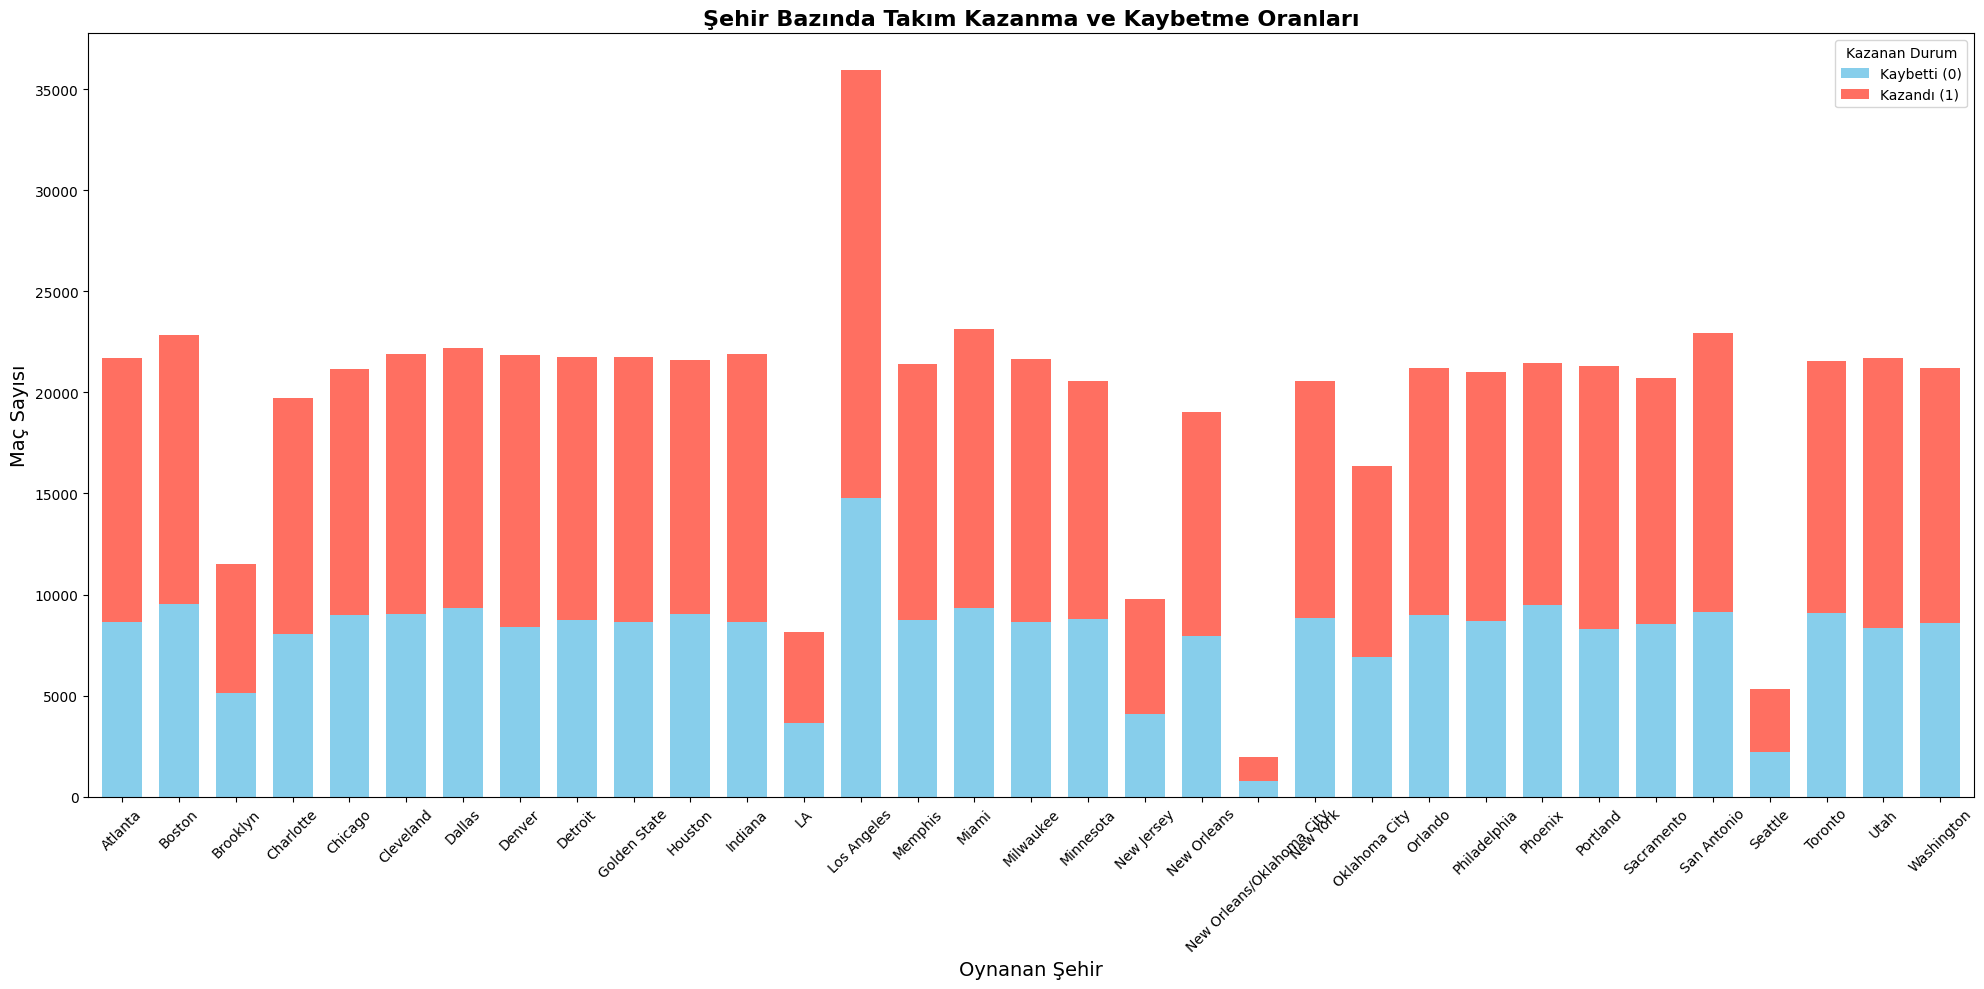

In [22]:
# Şehir Bazlı Takım Kazanma Oranının Analizi
games = pd.read_csv("games.csv")
games_details = pd.read_csv("games_details.csv")

# Sütun İsimlerini Türkçeleştirme
games.columns = [
    "Oyun_Günü", "Oyun_No", "Oyun_Durumu", "Ana_Takım_No", 
    "Ziyaretci_Takım_No", "Sezon", "Ana_Takım_No_Kopya", 
    "Ana_Takım_Puan", "Ana_T_Saha_Gol_Yüzdesi", 
    "Ana_T_Serbest_Atış_Yüzdesi", "Ana_T_Üç_Sayı_Yüzdesi", 
    "Ana_T_Assist", "Ana_T_Saha_Gol_Ribaund", 
    "Ziyaretci_Takım_No_Kopya", "Deplasman_Takım_Puan", 
    "Deplasman_Saha_Gol", "Deplasman_Serbest_Atış", 
    "Deplasman_ÜçPuan", "Deplasman_Assist", "Deplasman_Ribaund", 
    "Ana_Takım_Kazanma"
]

games_details.columns = [
    "Oyun_No", "Takım_No", "Takım_Kısaltması", "Oynanan_Şehir", 
    "Oyuncu_No", "Oyuncu_İsmi", "Oyuncu_Pozisyonu", "Başlangıç_Pozisyonu",
    "Yorum", "Oynanan_Dakika", "Saha_Gol_Dk", "Saha_Hedef", 
    "Alan_Hedef", "Saha_Üç_Sayı_Yüzdesi", "Denenen_Üç_Sayılık_Yüzdesi", 
    "Üç_Sayılık_Yüzdesi", "Yapılan_Serbest_Atış", "Serbest_Atış_Denemesi", 
    "Serbest_Atış_Yüzdesi", "Hücüm_Ribaundları", "Savunma_Ribaundları", 
    "Ribaund", "Asist", "Yıldızı_Parlayan", "Engellenen_Cekimler", 
    "Devir", "Kişisel_Faul", "Oyuncu_Puan", "Artı_Eksi"
]

# Verilerin Birleştirilmesi
merged_df = pd.merge(games, games_details, how="outer", on="Oyun_No")

# Şehir Bazında Takımın Kazanma Oranı
plt.figure(figsize=(20, 10))
merged_df.groupby("Oynanan_Şehir")["Ana_Takım_Kazanma"].value_counts().unstack().plot(
    kind="bar", stacked=True, color=["#87CEEB", "#FF6F61"], figsize=(20, 10), width=0.7
)

# Grafik Etiketleme
plt.title("Şehir Bazında Takım Kazanma ve Kaybetme Oranları", fontsize=16, fontweight="bold")
plt.xlabel("Oynanan Şehir", fontsize=14)
plt.ylabel("Maç Sayısı", fontsize=14)
plt.legend(["Kaybetti (0)", "Kazandı (1)"], title="Kazanan Durum", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Sonuçların Yorumu
print("\nGrafik Yorumu:")
print("Los Angeles'ta oynanan maçlarda ev sahibi takımların daha fazla galibiyet aldığı görülmektedir.")
print("En az kazanan şehir ise 'New Orleans/Oklahoma City' olmuştur.")



Grafik Yorumu:
Los Angeles'ta oynanan maçlarda ev sahibi takımların daha fazla galibiyet aldığı görülmektedir.
En az kazanan şehir ise 'New Orleans/Oklahoma City' olmuştur.


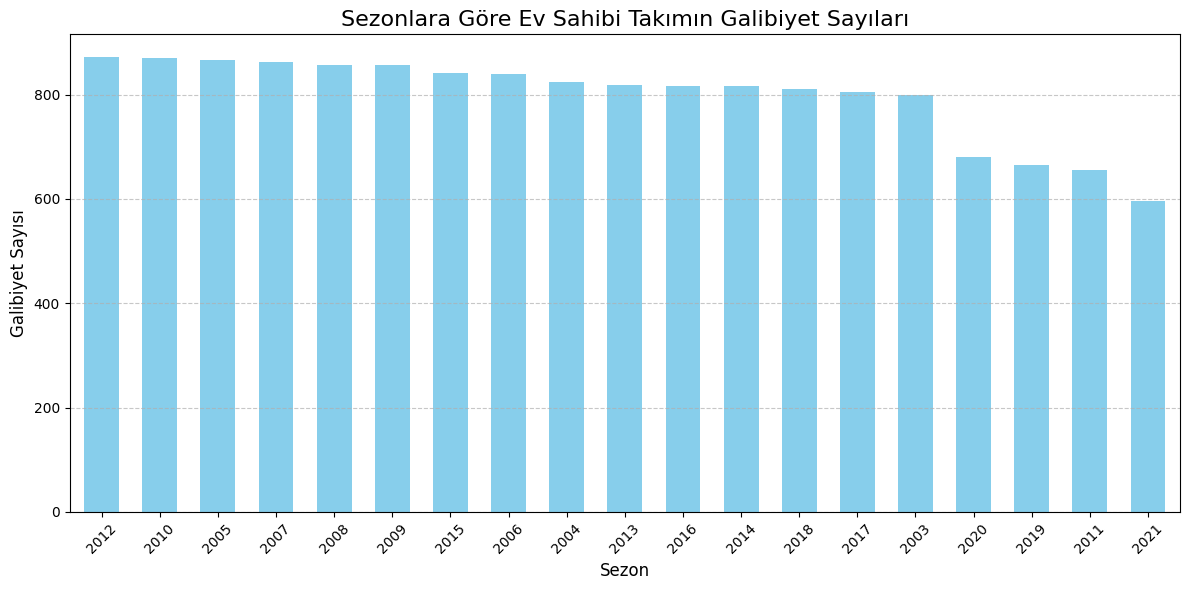

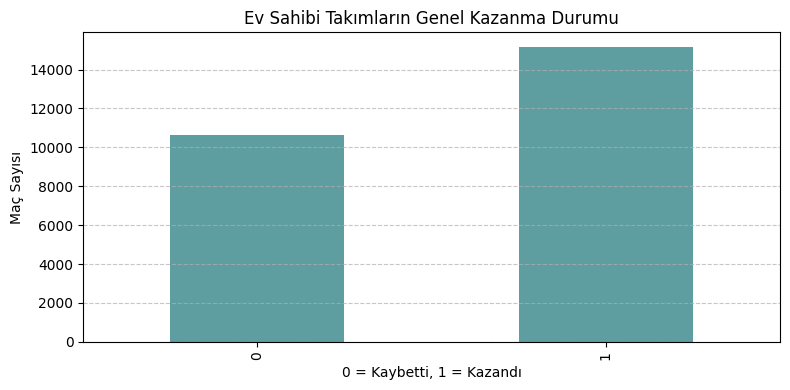

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# games.csv dosyasını oku
games = pd.read_csv("games.csv")

# Sütun isimlerini Türkçeleştirme
games.columns = [
    "Oyun_Günü", "Oyun_No", "Oyun_Durumu", "Ana_Takım_No", "Ziyaretci_Takım_No", 
    "Sezon", "Ana_Takım_No_Kopya", "Ana_Takım_Puan", "Ana_T_Saha_Gol_Yüzdesi", 
    "Ana_T_Serbest_Atış_Yüzdesi", "Ana_T_Üç_Sayı_Yüzdesi", "Ana_T_Assist", 
    "Ana_T_Saha_Gol_Ribaund", "Ziyaretci_Takım_No_Kopya", "Deplasman_Takım_Puan", 
    "Deplasman_Saha_Gol", "Deplasman_Serbest_Atış", "Deplasman_ÜçPuan", 
    "Deplasman_Assist", "Deplasman_Ribaund", "Ana_Takım_Kazanma"
]

# Eksik verilerin doldurulması
games.fillna(0, inplace=True)

# Sezonlara göre ev sahibi takımın maçı kazanma durumu
plt.figure(figsize=(12, 6))
games.groupby("Sezon")["Ana_Takım_Kazanma"].sum().sort_values(ascending=False).plot.bar(width=0.6, color="#87CEEB")

# Grafik başlıkları ve etiketleri
plt.title("Sezonlara Göre Ev Sahibi Takımın Galibiyet Sayıları", fontsize=16)
plt.xlabel("Sezon", fontsize=12)
plt.ylabel("Galibiyet Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Genel kazanma ve kaybetme durumlarını inceleme
genel_kazanc = games.groupby("Ana_Takım_Kazanma").size()

# Görselleştirme
plt.figure(figsize=(8, 4))
genel_kazanc.plot.bar(
    width=0.5, color="#5F9EA0", title="Ev Sahibi Takımların Genel Kazanma Durumu"
)
plt.ylabel("Maç Sayısı")
plt.xlabel("0 = Kaybetti, 1 = Kazandı")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Model Doğruluğu: 0.99

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2157
           1       0.98      0.99      0.99      3003

    accuracy                           0.99      5160
   macro avg       0.99      0.98      0.99      5160
weighted avg       0.99      0.99      0.99      5160



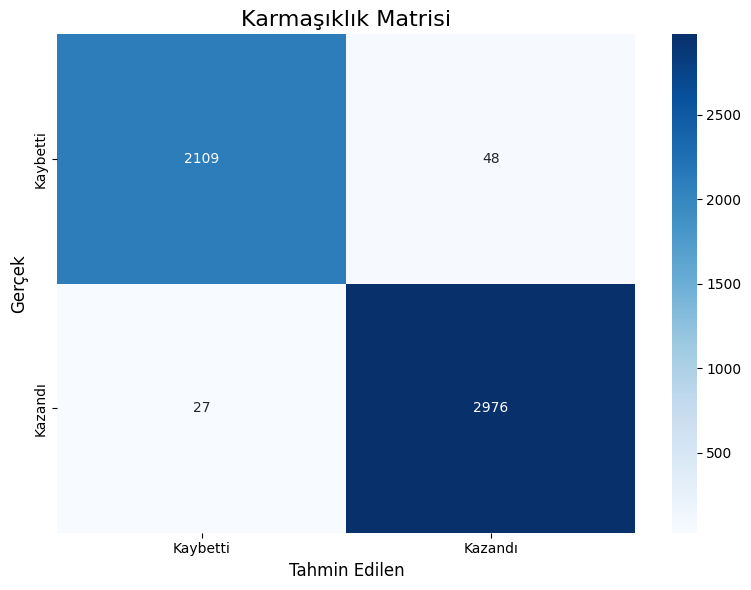

C:\Users\Mrlka\AppData\Local\Temp\ipykernel_24384\3097158849.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Özellik Önemi"], y=feature_importances.index, palette="viridis")


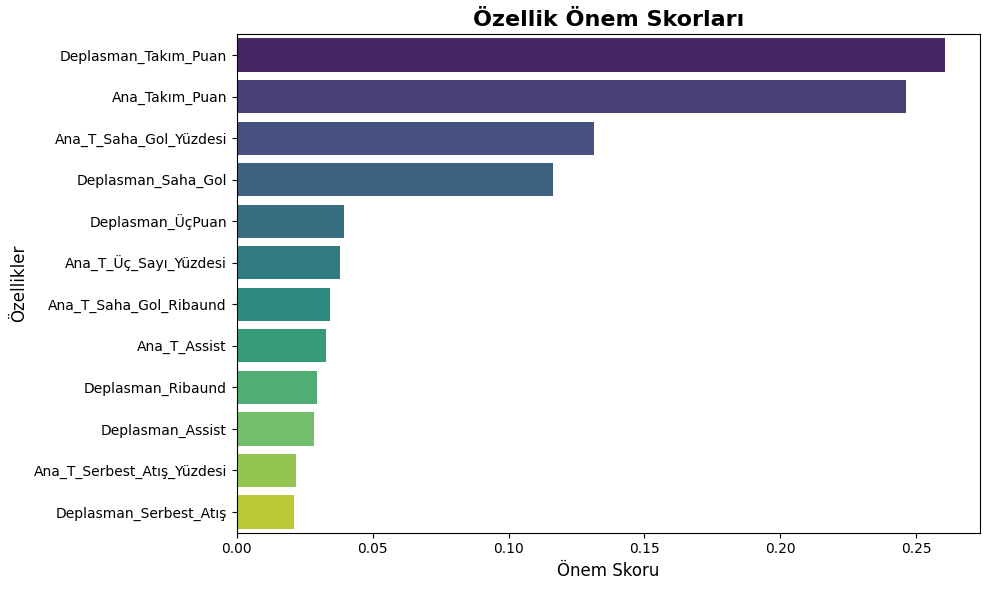

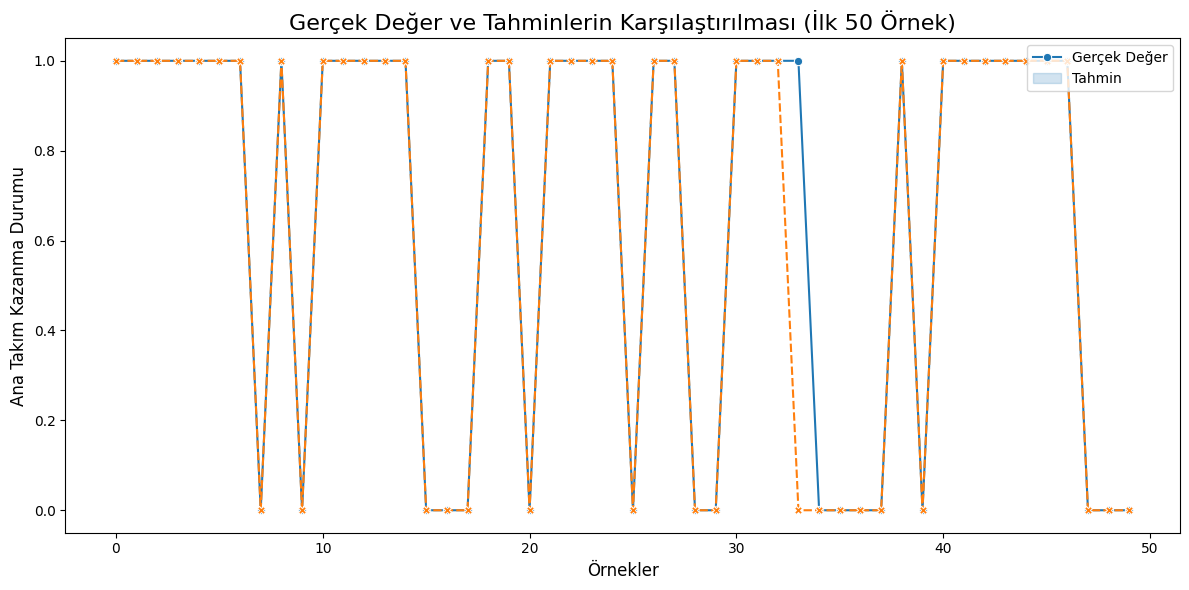

In [26]:


# Makine Öğrenmesi - Model Eğitimi ve Tahmin

# Özellik sütunları (X) ve hedef sütunu (y)
X = games[[
    "Ana_Takım_Puan", "Ana_T_Saha_Gol_Yüzdesi", "Ana_T_Serbest_Atış_Yüzdesi",
    "Ana_T_Üç_Sayı_Yüzdesi", "Ana_T_Assist", "Ana_T_Saha_Gol_Ribaund",
    "Deplasman_Takım_Puan", "Deplasman_Saha_Gol", "Deplasman_Serbest_Atış",
    "Deplasman_ÜçPuan", "Deplasman_Assist", "Deplasman_Ribaund"
]]
y = games["Ana_Takım_Kazanma"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2f}")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Kaybetti", "Kazandı"], yticklabels=["Kaybetti", "Kazandı"])
plt.title("Karmaşıklık Matrisi", fontsize=16)
plt.xlabel("Tahmin Edilen", fontsize=12)
plt.ylabel("Gerçek", fontsize=12)
plt.tight_layout()
plt.show()

# Özelliklerin önemini görselleştirme
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Özellik Önemi"])
feature_importances = feature_importances.sort_values(by="Özellik Önemi", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Özellik Önemi"], y=feature_importances.index, palette="viridis")
plt.title("Özellik Önem Skorları", fontsize=16, fontweight="bold")
plt.xlabel("Önem Skoru", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.tight_layout()
plt.show()

# Tahminlerin gerçek değerlerle karşılaştırılması
comparison = pd.DataFrame({"Gerçek Değer": y_test, "Tahmin": y_pred}).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison[:50], markers=True)
plt.title("Gerçek Değer ve Tahminlerin Karşılaştırılması (İlk 50 Örnek)", fontsize=16)
plt.ylabel("Ana Takım Kazanma Durumu", fontsize=12)
plt.xlabel("Örnekler", fontsize=12)
plt.legend(["Gerçek Değer", "Tahmin"], loc="upper right")
plt.tight_layout()
plt.show()
